Description: Under a current system implemented by a banking company, only a small percentage of customers see recommendations for products causing an unbalanced customer experience. The company would like a more effective recommendation system as to ensure customer satisfication. 

Objective: Given 1.5 years of data from Santander bank, starting from 1/28/2015. The data shows what products customers have each month, like credit cards or savings accounts. The task is to predict what extra products customers will buy by the end of 06/2016, compared to what they had in  05/2016.



In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [26]:
#Loading it up

file = "train_ver2_500000.csv"
file_2 = "test_ver2.csv.zip"
df = pd.read_csv(file)
df_test = pd.read_csv(file_2)

/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_36983/3507445945.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/var/folders/j6/qffj6d9509bfydvp_5l5_yhm0000gn/T/ipykernel_36983/3507445945.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(file_2)


In [27]:
#Variable names

VarNames = ["fecha_dato","ncodpers","ind_empleado","pais_residencia","sexo","age","fecha_alta","ind_nuevo","antiguedad","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","renta","segmento","ind_ahor_fin_ult1","ind_aval_fin_ult1","ind_cco_fin_ult1","ind_cder_fin_ult1","ind_cno_fin_ult1","ind_ctju_fin_ult1","ind_ctma_fin_ult1","ind_ctop_fin_ult1","ind_ctpp_fin_ult1","ind_deco_fin_ult1","ind_deme_fin_ult1","ind_dela_fin_ult1","ind_ecue_fin_ult1","ind_fond_fin_ult1","ind_hip_fin_ult1","ind_plan_fin_ult1","ind_pres_fin_ult1","ind_reca_fin_ult1","ind_tjcr_fin_ult1","ind_valo_fin_ult1","ind_viv_fin_ult1","ind_nomina_ult1","ind_nom_pens_ult1","ind_recibo_ult1"]

In [29]:
print(df)

        fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0       2015-01-28   1375586            N              ES    H   35   
1       2015-01-28   1050611            N              ES    V   23   
2       2015-01-28   1050612            N              ES    V   23   
3       2015-01-28   1050613            N              ES    H   22   
4       2015-01-28   1050614            N              ES    V   23   
...            ...       ...          ...             ...  ...  ...   
499994  2015-01-28    662262            N              ES    H   40   
499995  2015-01-28    662260            N              ES    V   31   
499996  2015-01-28    662206            N              ES    H   29   
499997  2015-01-28    662210            N              ES    V   52   
499998  2015-01-28    662212            N              ES    V   34   

        fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0       2015-01-12        0.0          6     1.0  ...                0   

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha_dato             499999 non-null  object 
 1   ncodpers               499999 non-null  int64  
 2   ind_empleado           494610 non-null  object 
 3   pais_residencia        494610 non-null  object 
 4   sexo                   494609 non-null  object 
 5   age                    499999 non-null  object 
 6   fecha_alta             494610 non-null  object 
 7   ind_nuevo              494610 non-null  float64
 8   antiguedad             499999 non-null  object 
 9   indrel                 494610 non-null  float64
 10  ult_fec_cli_1t         660 non-null     object 
 11  indrel_1mes            494610 non-null  float64
 12  tiprel_1mes            494610 non-null  object 
 13  indresi                494610 non-null  object 
 14  indext                 494610 non-nu

In [31]:
##I can already tell I'm going to drop the 99% columns

df.isnull().sum()/df.shape[0] * 100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              1.077802
pais_residencia           1.077802
sexo                      1.078002
age                       0.000000
fecha_alta                1.077802
ind_nuevo                 1.077802
antiguedad                0.000000
indrel                    1.077802
ult_fec_cli_1t           99.868000
indrel_1mes               1.077802
tiprel_1mes               1.077802
indresi                   1.077802
indext                    1.077802
conyuemp                 99.982200
canal_entrada             1.085802
indfall                   1.077802
tipodom                   1.077802
cod_prov                  1.559003
nomprov                   1.559003
ind_actividad_cliente     1.077802
renta                    17.780236
segmento                  1.088602
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [32]:
df.duplicated().sum()

0

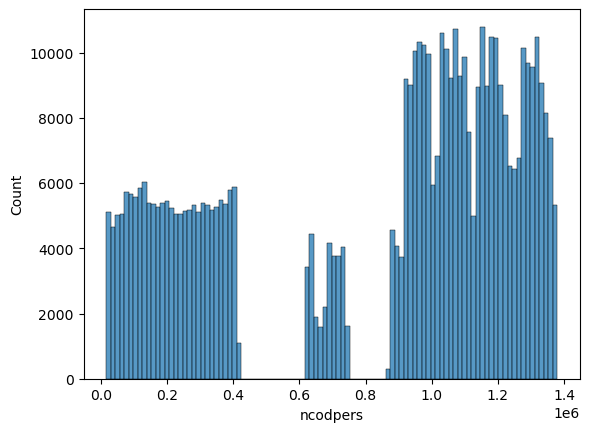

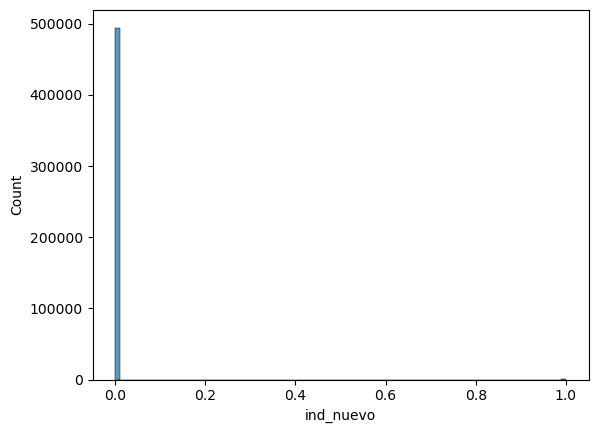

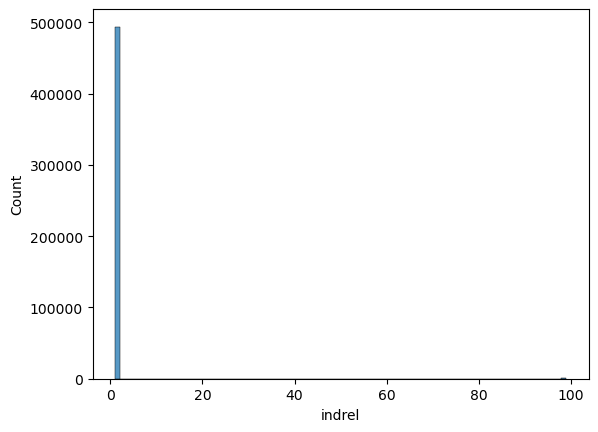

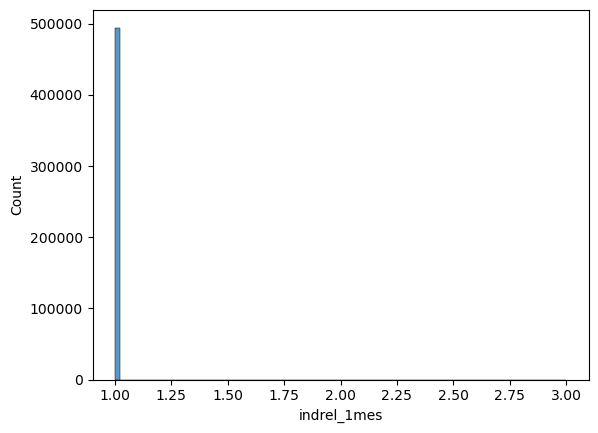

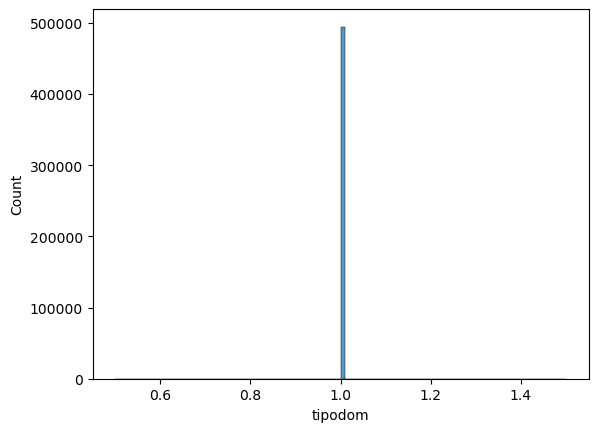

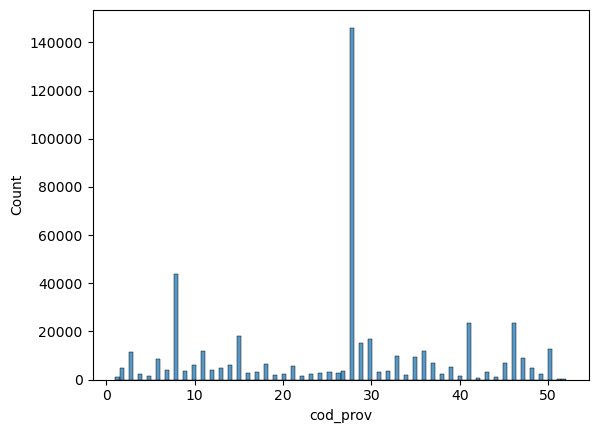

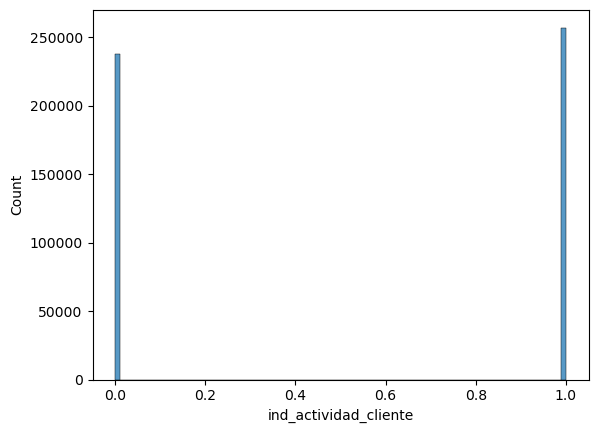

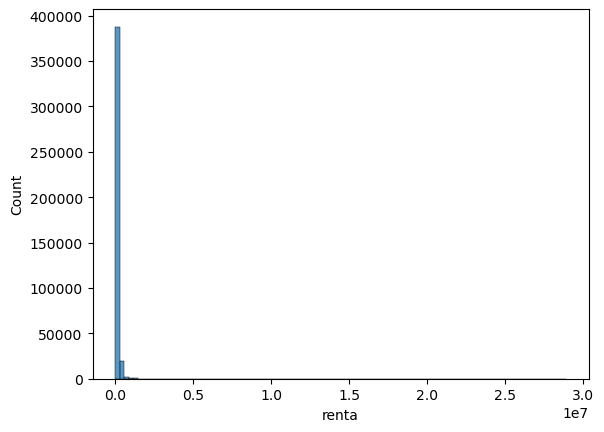

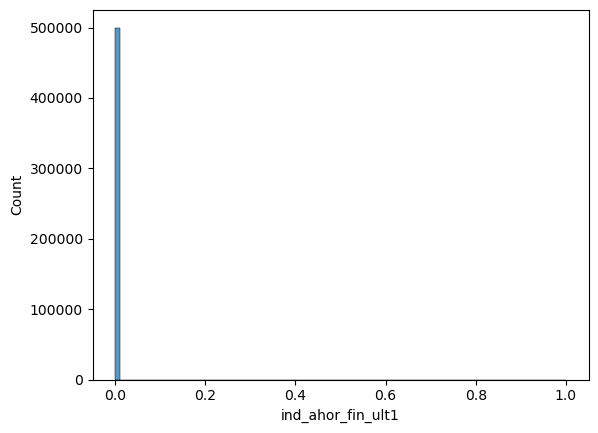

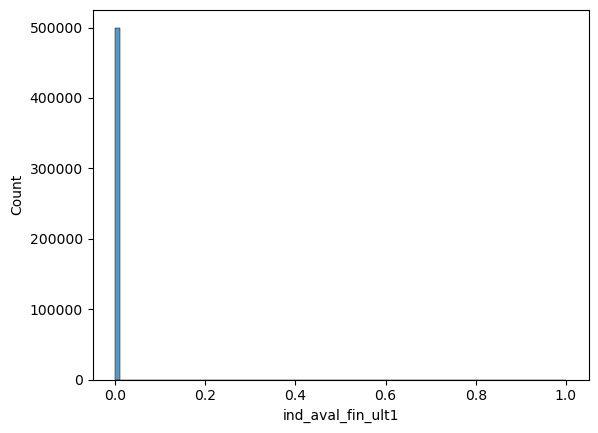

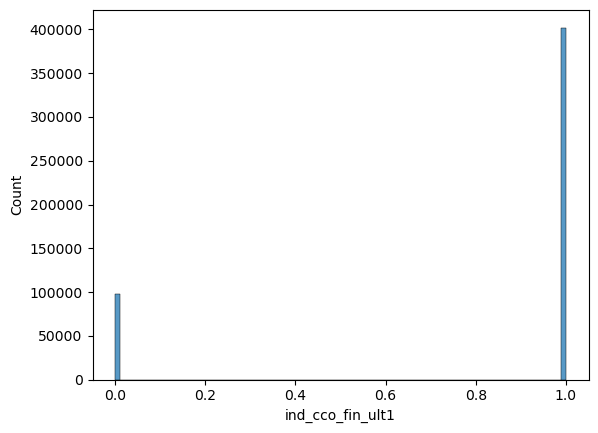

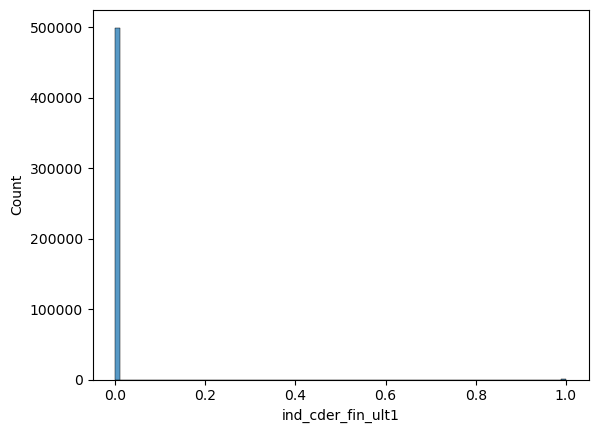

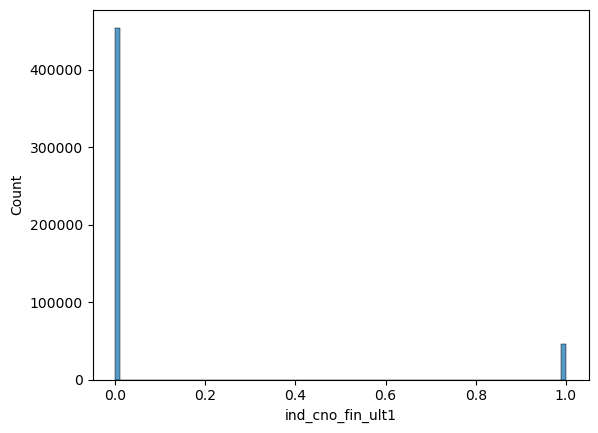

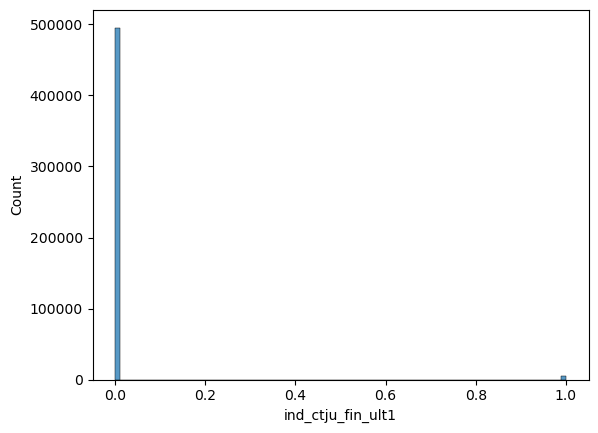

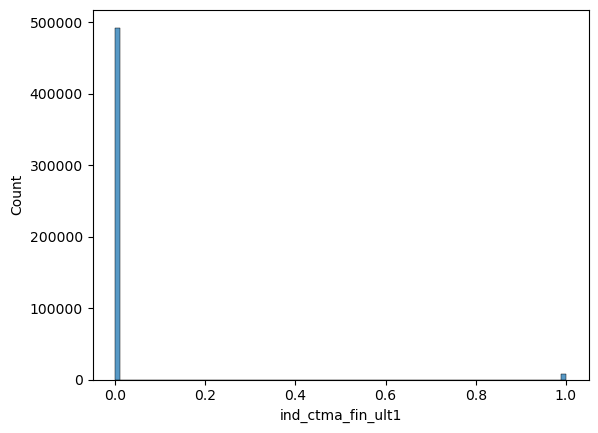

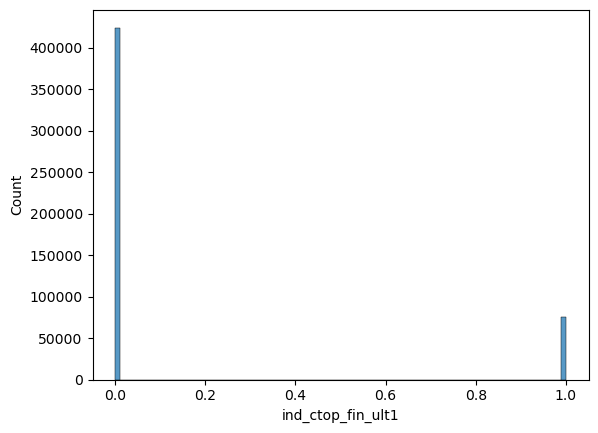

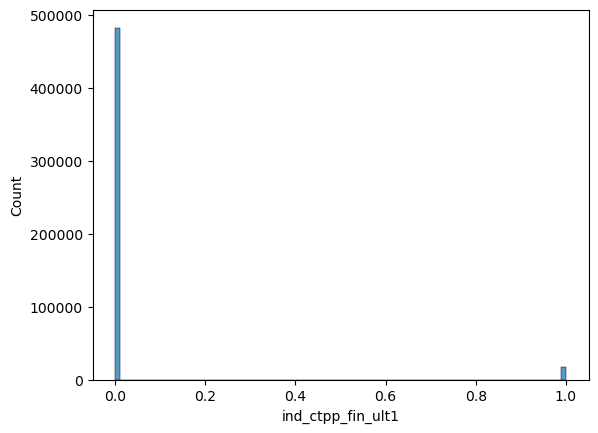

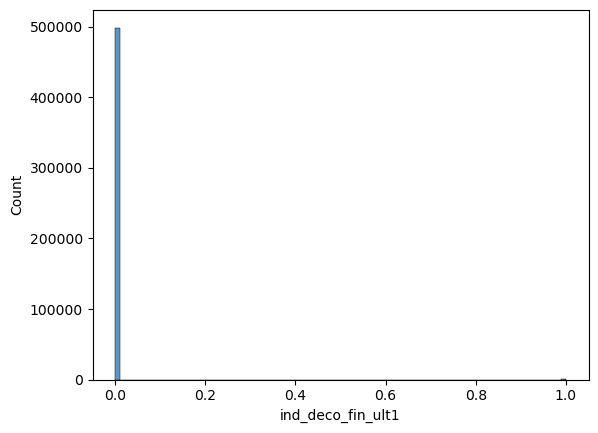

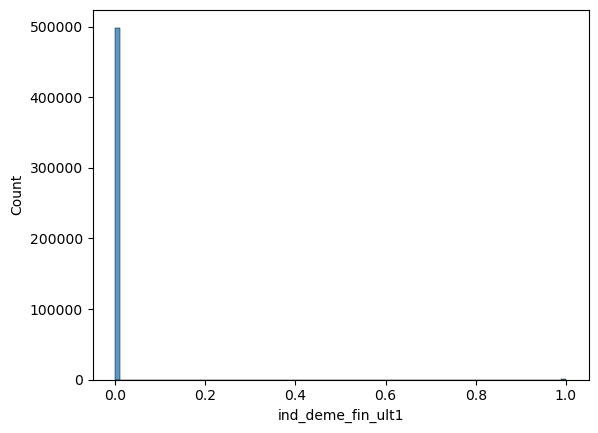

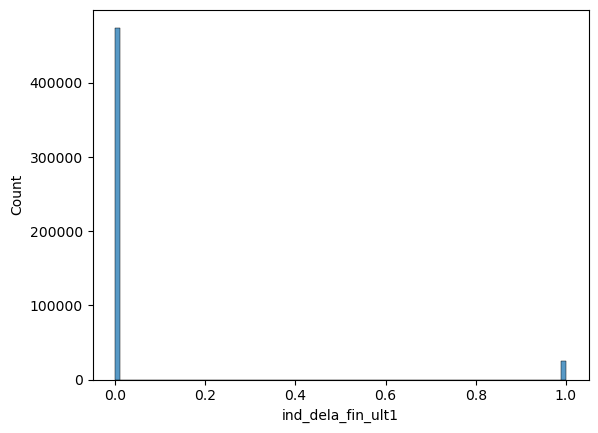

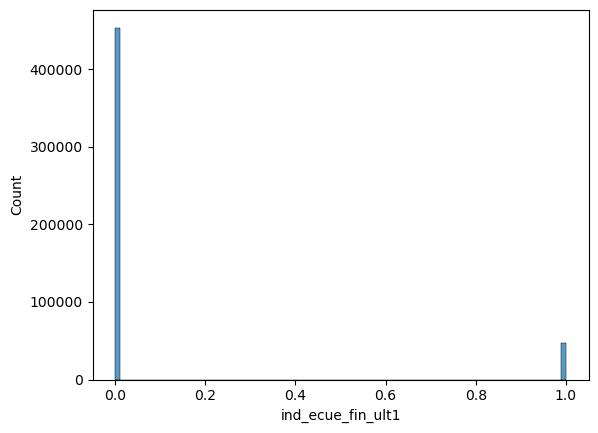

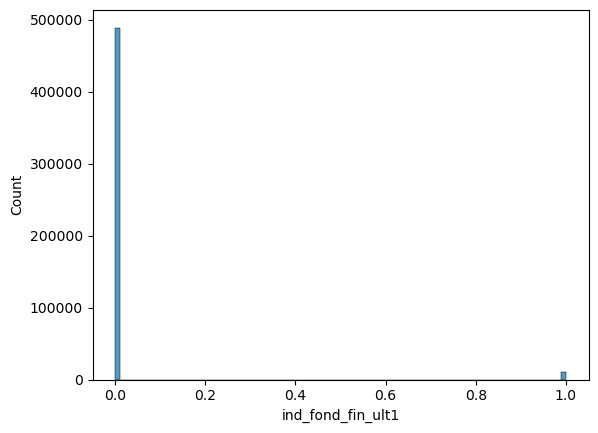

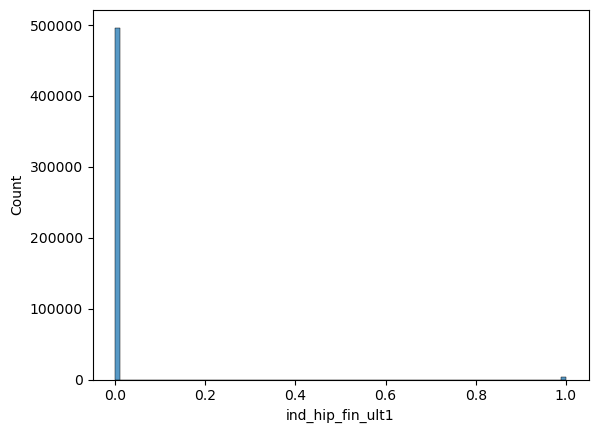

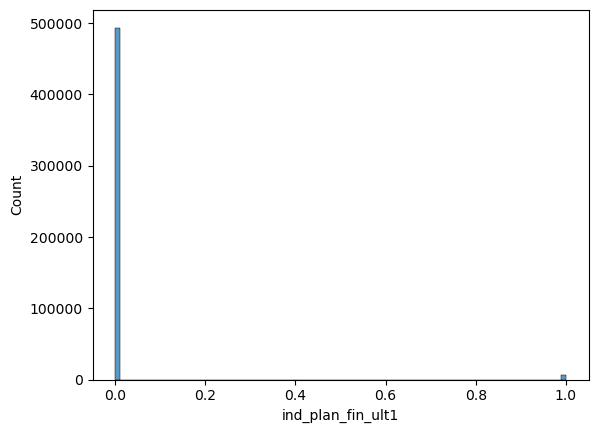

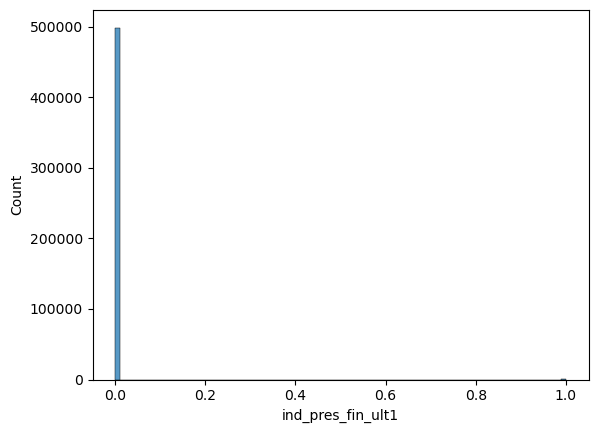

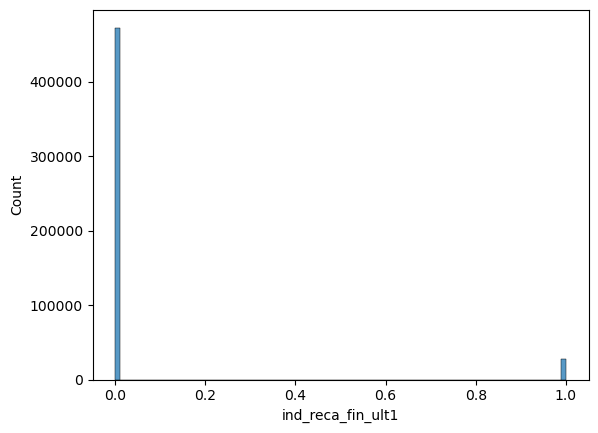

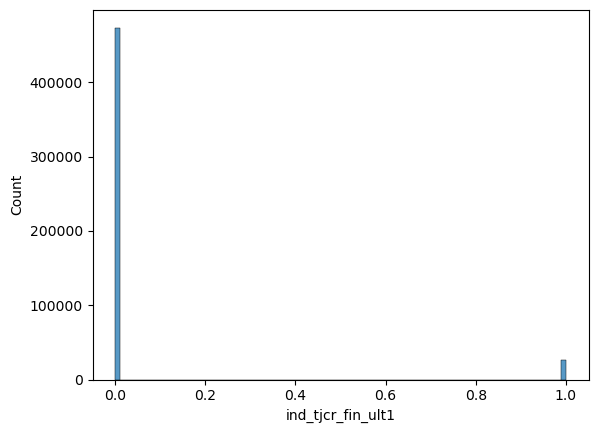

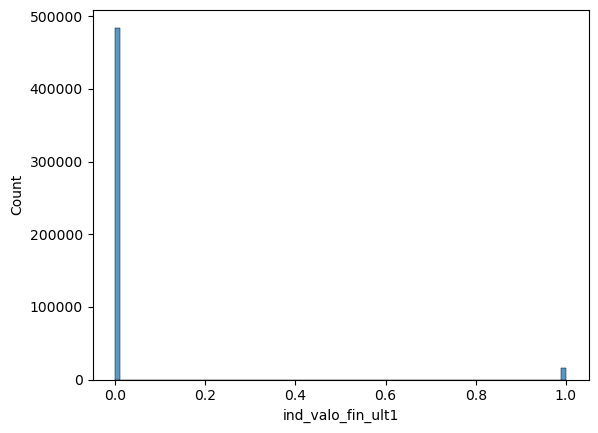

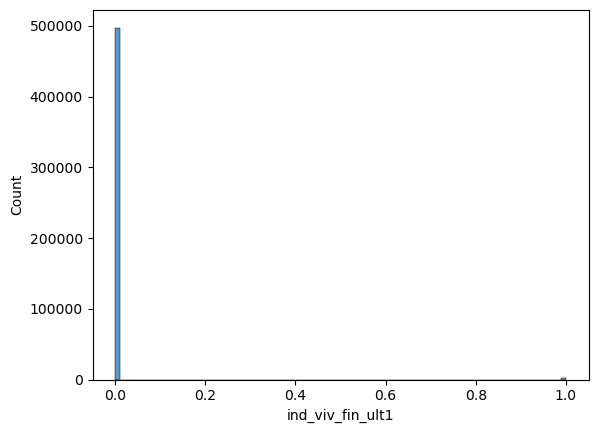

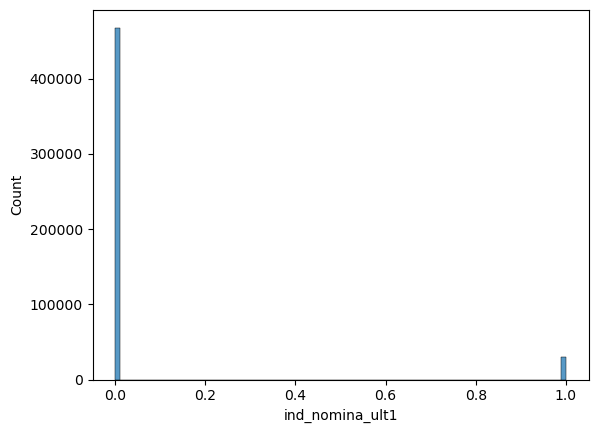

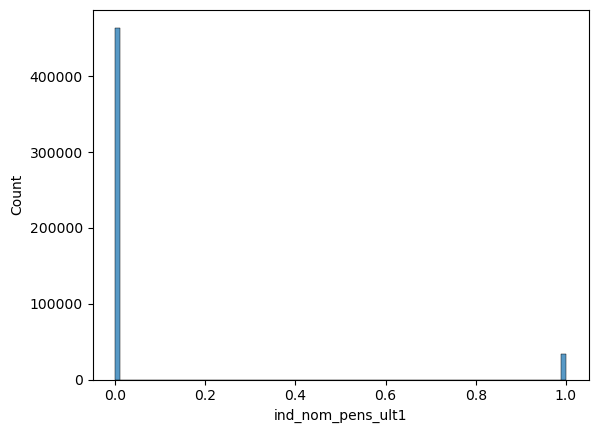

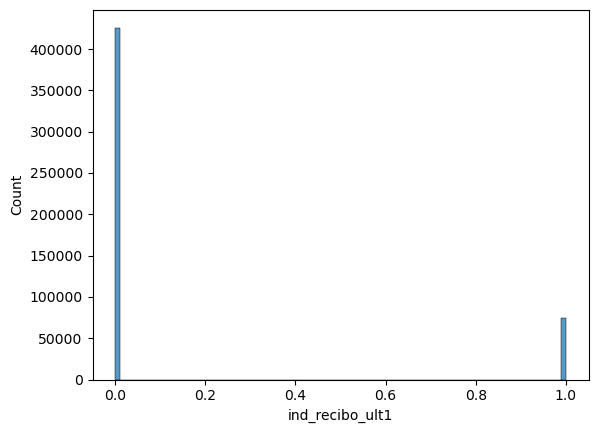

In [33]:
for i in df.select_dtypes(include = 'number').columns:
    sns.histplot(data = df, x=i, bins = 100)
    plt.show()

In [34]:
##Start cleaning (for simplicty dropping all columns that won't be used for features)

df.drop(columns=["fecha_dato", "ult_fec_cli_1t", "conyuemp", "ncodpers", "pais_residencia", "sexo", "fecha_alta", "antiguedad","indrel","indresi","indext", "canal_entrada", "indfall", "tipodom", "cod_prov", "nomprov", "segmento"], inplace=True)

In [35]:
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

In [36]:
#Cleaning and grouping

def numerical_cleaning(df):
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())
    return df

def categorical_cleaning(df):
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode())
    return df

df = numerical_cleaning(df)
df = categorical_cleaning(df)

age_group = [0, 21, 35, 60, 100]
age_labels = ['Young', 'Adult', 'Senior', 'Elder']
percentiles = [0, 25, 50, 75, 100]

df['age_grouped'] = pd.cut(df.age, bins = age_group, labels = age_labels)
df['income_grouped'] = pd.cut(df['renta'], len(percentiles) - 1, labels=percentiles[:-1])

In [ ]:
#Now that the age and income (renta) columns are grouped I'll drop them

df.drop(columns=['age', 'renta'], inplace=True)

In [ ]:
#Define features and target variables

features = [col for col in df.columns if col in ['ind_empleado', 'age', 'indrel_1mes', 'tiprel_1mes', 'ind_actividad_cliente', 'age_grouped', 'income_grouped']]
target_variables = df.columns[8:]

In [37]:
df.head()

,ind_empleado,age,ind_nuevo,indrel_1mes,tiprel_1mes,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,N,35,0.0,1.0,A,1.0,87218.10,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,N,23,0.0,1.0,I,0.0,35548.74,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,N,23,0.0,1.0,I,0.0,122179.11,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,N,22,0.0,1.0,I,0.0,119775.54,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,N,23,0.0,1.0,A,1.0,99826.68,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499999 entries, 0 to 499998
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ind_empleado           494610 non-null  object 
 1   age                    499999 non-null  object 
 2   ind_nuevo              499999 non-null  float64
 3   indrel_1mes            499999 non-null  float64
 4   tiprel_1mes            494610 non-null  object 
 5   ind_actividad_cliente  499999 non-null  float64
 6   renta                  499999 non-null  float64
 7   ind_ahor_fin_ult1      499999 non-null  int64  
 8   ind_aval_fin_ult1      499999 non-null  int64  
 9   ind_cco_fin_ult1       499999 non-null  int64  
 10  ind_cder_fin_ult1      499999 non-null  int64  
 11  ind_cno_fin_ult1       499999 non-null  int64  
 12  ind_ctju_fin_ult1      499999 non-null  int64  
 13  ind_ctma_fin_ult1      499999 non-null  int64  
 14  ind_ctop_fin_ult1      499999 non-nu

In [39]:
#Encoding

encoder = LabelEncoder()
for col in categorical_columns:
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])


In [40]:
df.head()

,ind_empleado,age,ind_nuevo,indrel_1mes,tiprel_1mes,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,3,33,0.0,1.0,0,1.0,87218.10,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
1,3,21,0.0,1.0,1,0.0,35548.74,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
2,3,21,0.0,1.0,1,0.0,122179.11,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
3,3,20,0.0,1.0,1,0.0,119775.54,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,3,21,0.0,1.0,0,1.0,99826.68,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0


In [ ]:
##Histogram for features

In [ ]:
##Scatterplot for features

In [ ]:
##Histogram for variables

In [ ]:
##Scatterplot for variables

In [ ]:
##Histogram or scatterplot correlation between variables and features

In [ ]:
##Train data